In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris 
import seaborn as sns
from utils import variables as var
from sklearn.linear_model import LinearRegression
#Financiero
import yfinance as yf
import quantstats as qs
import ta

In [456]:
#Using an 8Gbyte archive, we generate the main DataSets and the we export to csv
stocks=pd.read_csv(r"C:\Users\Adrian\Documents\DATA_SCIENCE_BOOTCAMP\DATA\sp500_stocks.csv")
buffet=stocks[stocks['Symbol']=='BRK-B']
waste=stocks[stocks['Symbol']=='WM']
# We mainly uses the csv archives + yfinance as an auxiliary module
gold=pd.read_csv('data/Gold_data.csv')
index_sp500=pd.read_csv('data/sp500_index.csv')
company=pd.read_csv('data/sp500_companies.csv')
buffet.to_csv('data/buffet.csv')
waste.to_csv('data/wastemanagement.csv')
waste.head()


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
1741432,2010-01-04,WM,23.382090,34.160000,34.259998,33.869999,34.009998,2058800.0
1741433,2010-01-05,WM,23.279421,34.009998,34.220001,33.779999,34.220001,2961700.0
1741434,2010-01-06,WM,23.272572,34.000000,34.150002,33.779999,33.869999,1636700.0
1741435,2010-01-07,WM,23.327345,34.080002,34.119999,33.820000,33.939999,1406700.0
1741436,2010-01-08,WM,23.436859,34.240002,34.330002,33.669998,33.919998,1451900.0


In [457]:
#Para hacer el índice de magnificas, vamos a generar los 5 datasets de cada acción y luego lo concatenaremos más adelante

msft=stocks[stocks['Symbol']=='MSFT'].set_index('Date')
appl=stocks[stocks['Symbol']=='AAPL'].set_index('Date')
meta=stocks[stocks['Symbol']=='META'].set_index('Date')
goog=stocks[stocks['Symbol']=='GOOG'].set_index('Date')
amzn=stocks[stocks['Symbol']=='AMZN'].set_index('Date')
amzn.head()

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2010-01-04,AMZN,6.6950,6.6950,6.8305,6.6570,6.8125,151998000.0
2010-01-05,AMZN,6.7345,6.7345,6.7740,6.5905,6.6715,177038000.0
2010-01-06,AMZN,6.6125,6.6125,6.7365,6.5825,6.7300,143576000.0
2010-01-07,AMZN,6.5000,6.5000,6.6160,6.4400,6.6005,220604000.0
2010-01-08,AMZN,6.6760,6.6760,6.6840,6.4515,6.5280,196610000.0


## 0. ESTADO Y LIMPIEZA DE LOS DATOS

In [458]:
#VAMOS A MIRAR EL ESTADO DE LOS DATOS DE CADA COLUMNA
gold.info()
print('//////////////////////////////////////////////////// \n')
index_sp500.info()
print('//////////////////////////////////////////////////// \n')
company.info()
print('//////////////////////////////////////////////////// \n')
buffet.info()
print('//////////////////////////////////////////////////// \n')
waste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5929 entries, 0 to 5928
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5929 non-null   object 
 1   open    5929 non-null   float64
 2   high    5929 non-null   float64
 3   low     5929 non-null   float64
 4   close   5929 non-null   float64
 5   volume  5929 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 278.1+ KB
//////////////////////////////////////////////////// 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2518 non-null   object 
 1   S&P500  2518 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB
//////////////////////////////////////////////////// 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column 

- PARA NUESTRO ESTUDIO NO NECESITAMOS PRECIO APERTURA, MAXIMO DIARIO Y MÍNIMO DIARIO: SE DROPEARAN ESAS COLUMNAS
- NECESITAMOS GENERAR UNA COLUMNA CON LA FECHA EN FORMATO DATETIME YA QUE NOS VIENE COMO OBJECT
- EN EL DATASET COMPANIES LOS VALORES NULOS SON CASI INAPRECIABLES COMO PARA DESVIAR EL ESTUDIO

#### OJO 
LOS VALORES NULOS QUE TENEMOS HACEN REFERENCIA A LOS DÍAS FESTIVOS, CUYO VOLUMEN DE NEGOCIACION ES 0 Y EL PRECIO NO VARÍA EN NINGUN MOMENTO, CON LO QUE HAREMOS UN DROP DE ESAS FILAS

### ELIMINADO VALORES FESTIVOS

In [459]:
company=company.dropna()
company.info()
buffet = buffet.dropna()
waste=waste.dropna()
waste.info()
msft=msft.dropna()
appl=appl.dropna()
meta=meta.dropna()
goog=goog.dropna()
amzn=amzn.dropna()
amzn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             449 non-null    object 
 1   Symbol               449 non-null    object 
 2   Shortname            449 non-null    object 
 3   Longname             449 non-null    object 
 4   Sector               449 non-null    object 
 5   Industry             449 non-null    object 
 6   Currentprice         449 non-null    float64
 7   Marketcap            449 non-null    int64  
 8   Ebitda               449 non-null    float64
 9   Revenuegrowth        449 non-null    float64
 10  City                 449 non-null    object 
 11  State                449 non-null    object 
 12  Country              449 non-null    object 
 13  Fulltimeemployees    449 non-null    float64
 14  Longbusinesssummary  449 non-null    object 
 15  Weight               449 non-null    float64


### ELIMINADO VALORES DE TRADING

In [460]:
lista_columnas=['open','high','low']
lista_columnas1=['Open','High','Low','Adj Close']


gold=gold.drop(lista_columnas, axis=1)
gold.info()
buffet=buffet.drop(lista_columnas1,axis=1)
waste=waste.drop(lista_columnas1,axis=1)
msft=msft.drop(lista_columnas1,axis=1)
appl=appl.drop(lista_columnas1,axis=1)
meta=meta.drop(lista_columnas1,axis=1)
goog=goog.drop(lista_columnas1,axis=1)
amzn=amzn.drop(lista_columnas1,axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5929 entries, 0 to 5928
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5929 non-null   object 
 1   close   5929 non-null   float64
 2   volume  5929 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 139.1+ KB


### CONCATENACION MAGNIFICAS

In [461]:
magnificas=pd.concat([msft,appl,meta,goog,amzn],axis=1,join='inner')

magnificas.head()

,Symbol,Close,Volume,Symbol,Close,Volume,Symbol,Close,Volume,Symbol,Close,Volume,Symbol,Close,Volume
Date,,,,,,,,,,,,,,,
2012-05-18,MSFT,29.270000,56205300.0,AAPL,18.942142,732292400.0,META,38.230000,573576400.0,GOOG,14.953949,239835606.0,AMZN,10.6925,104634000.0
2012-05-21,MSFT,29.750000,38787900.0,AAPL,20.045713,631106000.0,META,34.029999,168192700.0,GOOG,15.295419,123477094.0,AMZN,10.9055,71596000.0
2012-05-22,MSFT,29.760000,39504900.0,AAPL,19.891787,694870400.0,META,31.000000,101786600.0,GOOG,14.963912,122533571.0,AMZN,10.7665,74662000.0
2012-05-23,MSFT,29.110001,65171000.0,AAPL,20.377144,584897600.0,META,32.000000,73600000.0,GOOG,15.179603,127600492.0,AMZN,10.8640,84876000.0
2012-05-24,MSFT,29.070000,52575000.0,AAPL,20.190001,496230000.0,META,33.029999,50237200.0,GOOG,15.035145,75935562.0,AMZN,10.7620,62822000.0


### CREACION COLUMNAS DATE TIME Y AÑO

In [462]:
#A PARTIR DEL DATE OBJECT LO PASAMOS A DATETIME Y GENERAMOS LA COLUMNA DATETIME
gold['DateTime']=pd.to_datetime(gold['date'])
#CON EL DATE TIME GENERAMOS LA COLUMNA YEAR
gold['year']=gold['DateTime'].dt.year

gold.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5929 entries, 0 to 5928
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      5929 non-null   object        
 1   close     5929 non-null   float64       
 2   volume    5929 non-null   int64         
 3   DateTime  5929 non-null   datetime64[ns]
 4   year      5929 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 208.6+ KB


In [463]:
index_sp500['DateTime']=pd.to_datetime(index_sp500['Date'])
index_sp500['year']=index_sp500['DateTime'].dt.year
index_sp500.info()

buffet['DateTime']=pd.to_datetime(buffet['Date'])
index_sp500['year']=index_sp500['DateTime'].dt.year

magnificas=magnificas.reset_index()
magnificas['DateTime']=pd.to_datetime(magnificas['Date'])
magnificas['year']=magnificas['DateTime'].dt.year

waste['DateTime']=pd.to_datetime(waste['Date'])
waste['year']=waste['DateTime'].dt.year
magnificas.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2518 non-null   object        
 1   S&P500    2518 non-null   float64       
 2   DateTime  2518 non-null   datetime64[ns]
 3   year      2518 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 69.0+ KB


,Date,Symbol,Close,Volume,Symbol,Close,Volume,Symbol,Close,Volume,Symbol,Close,Volume,Symbol,Close,Volume,DateTime,year
0,2012-05-18,MSFT,29.270000,56205300.0,AAPL,18.942142,732292400.0,META,38.230000,573576400.0,GOOG,14.953949,239835606.0,AMZN,10.6925,104634000.0,2012-05-18,2012
1,2012-05-21,MSFT,29.750000,38787900.0,AAPL,20.045713,631106000.0,META,34.029999,168192700.0,GOOG,15.295419,123477094.0,AMZN,10.9055,71596000.0,2012-05-21,2012
2,2012-05-22,MSFT,29.760000,39504900.0,AAPL,19.891787,694870400.0,META,31.000000,101786600.0,GOOG,14.963912,122533571.0,AMZN,10.7665,74662000.0,2012-05-22,2012
3,2012-05-23,MSFT,29.110001,65171000.0,AAPL,20.377144,584897600.0,META,32.000000,73600000.0,GOOG,15.179603,127600492.0,AMZN,10.8640,84876000.0,2012-05-23,2012
4,2012-05-24,MSFT,29.070000,52575000.0,AAPL,20.190001,496230000.0,META,33.029999,50237200.0,GOOG,15.035145,75935562.0,AMZN,10.7620,62822000.0,2012-05-24,2012


### CREACION INDICE MAGNIFICAS

In [464]:
#Para ello sumaremos los valores al cierre y el volumen de negociación

magnificas['tkr'] = magnificas.iloc[:, 1] + magnificas.iloc[:, 4] + magnificas.iloc[:, 7] + magnificas.iloc[:, 10] + magnificas.iloc[:, 13]
magnificas['Valor_indice'] = magnificas.iloc[:, 2] + magnificas.iloc[:, 5] + magnificas.iloc[:, 8] + magnificas.iloc[:, 11] + magnificas.iloc[:, 14]
magnificas['Volumen_total'] = magnificas.iloc[:, 3] + magnificas.iloc[:, 6] + magnificas.iloc[:, 9] + magnificas.iloc[:, 12] + magnificas.iloc[:, 15]
magnificas = magnificas.drop(magnificas.columns[0:15], axis=1)
magnificas

#Finalmente guardamos en índice en un csv
magnificas.to_csv('data/magnificas.csv')

## 1. ANÁLISIS PRIMERA Y SEGUNDA HIPÓTESIS:

### EL SP500 ES EL MEJOR INDICE PARA INVERTIR SEGUIDO DEL ORO

Escogemos un periodo de los 10 últimos años para comparar ambos índices

In [465]:
# En primer lugar vamos a obtener los principales estadisticos de cada uno de los indices
gold= gold.query("'2014-04-10' <= `date` <= '2024-04-10'")
gold=gold.drop(['date'],axis=1)
gold[['close','volume']].describe()


,close,volume
count,2515.000000,2515.000000
mean,1512.873120,5297.195229
std,308.599873,29389.949450
min,1050.800049,0.000000
25%,1248.099976,46.000000
50%,1340.099976,175.000000
75%,1811.099976,536.500000
max,2343.500000,386334.000000


In [466]:

index_sp500=index_sp500.drop(['Date'],axis=1)
index_sp500= index_sp500.query("'2014-04-10' <= `DateTime` <= '2024-04-10'")
index_sp500

,S&P500,DateTime,year
0,1871.89,2014-04-21,2014
1,1879.55,2014-04-22,2014
2,1875.39,2014-04-23,2014
3,1878.61,2014-04-24,2014
4,1863.40,2014-04-25,2014
...,...,...,...
2506,5147.21,2024-04-04,2024
2507,5204.34,2024-04-05,2024
2508,5202.39,2024-04-08,2024
2509,5209.91,2024-04-09,2024


Estos estadísticos no nos dan una gran cantidad de información a excepción de los máximos y mínimos del todo el periodo.

Con lo que vamos a mirar su tendencia

In [467]:
#Primero ponemos la fecha como índice y representaremos ambas funciones 
gold.set_index('DateTime',inplace=True)

index_sp500.set_index('DateTime',inplace=True)

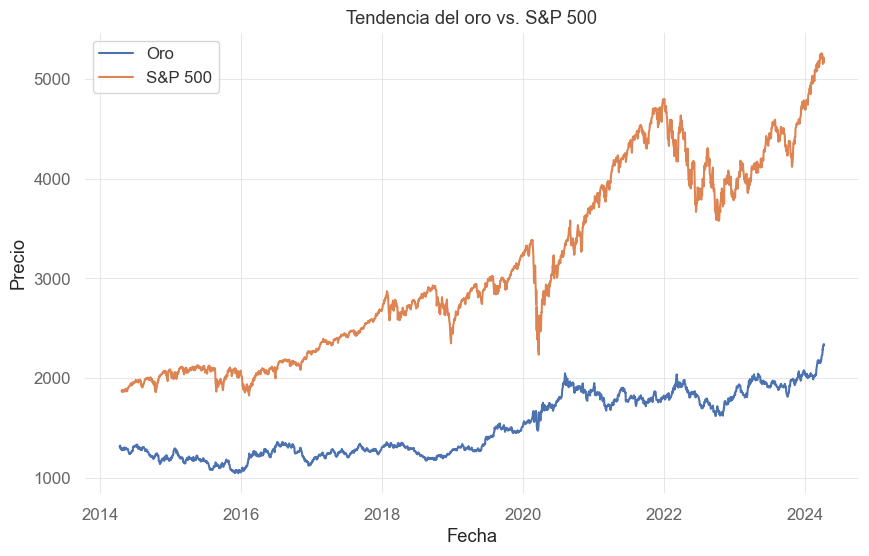

In [468]:
# Crear la gráfica
plt.figure(figsize=(10, 6))
sns.lineplot(x=gold.index, y="close", data=gold, label="Oro")
sns.lineplot(x=index_sp500.index, y="S&P500", data=index_sp500, label="S&P 500")
plt.title("Tendencia del oro vs. S&P 500")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.grid(True)
plt.show()

### Se observa una tendencia creciente en ambos índices, pero no se puede concluir si tienen correlación

#### Para ello vamos a concatenar ambos datasets y crearemos un matriz de correlación

In [469]:

hipo_dt=pd.concat([gold,index_sp500],axis=1,join='inner')


In [470]:
hipo_dt.sort_index(ascending= True)
hipo_dt=hipo_dt.rename(columns = {'close':'Oro'})
hipo_dt=hipo_dt.drop(['year','year'],axis=1)
hipo_dt

,Oro,volume,S&P500
DateTime,,,
2014-04-21,1288.000000,100,1871.89
2014-04-22,1280.599976,100,1879.55
2014-04-23,1284.199951,176,1875.39
2014-04-24,1290.500000,522,1878.61
2014-04-25,1300.699951,274,1863.40
...,...,...,...
2024-04-04,2288.800049,251,5147.21
2024-04-05,2325.699951,344,5204.34
2024-04-08,2331.699951,202,5202.39


Ya con la columna concatenada y limpia, buscamos si existe correlacción entre el SP500 y el índice del oro

In [471]:
SP_corr = hipo_dt.corr()
SP_corr


,Oro,volume,S&P500
Oro,1.000000,-0.020519,0.916015
volume,-0.020519,1.000000,-0.012257
S&P500,0.916015,-0.012257,1.000000


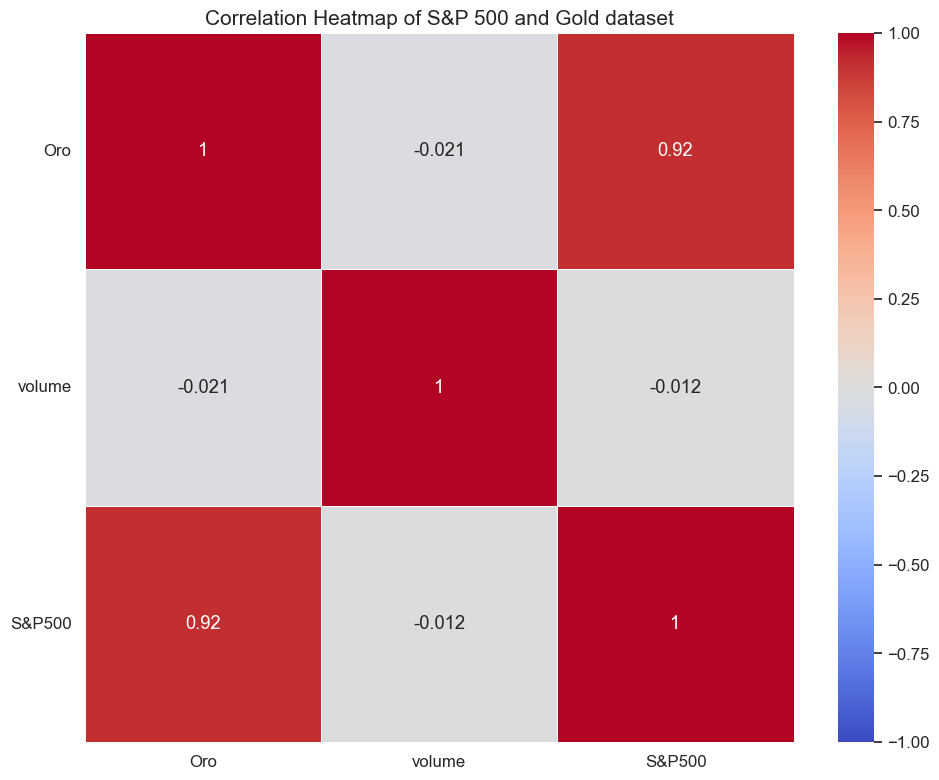

In [472]:
mask = np.zeros_like(SP_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(SP_corr,  vmax=1, vmin=-1, linewidths=.5, square=True, cmap='coolwarm', annot=True)
    plt.title('Correlation Heatmap of S&P 500 and Gold dataset', fontsize = 15)
    plt.yticks(rotation=0)
    plt.tight_layout()

### Como podemos observar, nuestra sospecha de correlación se valida ya que su índice de correlación es del 92%

#### Aún así vamos a mirar en el período dado invirtiendo 1000 usd que hubiera rentado más

In [473]:
#Hacemos un simple cálculo de rentabilidad entre las fechas de inicio y fecha fin
bc=1000
rent_sp500=(float(bc*hipo_dt['S&P500'].tail(1))-float(bc*hipo_dt['S&P500'].head(1)))*100/float(bc*hipo_dt['S&P500'].head(1));
rent_gold=(float(bc*hipo_dt['Oro'].tail(1))-float(bc*hipo_dt['Oro'].head(1)))*100/float(bc*hipo_dt['Oro'].head(1));

print(f" La rentabilidad del SP500 fue de {rent_sp500}% y la del oro del {rent_gold}")


 La rentabilidad del SP500 fue de 175.69141349117737% y la del oro del 80.8695727993983


C:\Users\Adrian\AppData\Local\Temp\ipykernel_6160\438296011.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rent_sp500=(float(bc*hipo_dt['S&P500'].tail(1))-float(bc*hipo_dt['S&P500'].head(1)))*100/float(bc*hipo_dt['S&P500'].head(1));
C:\Users\Adrian\AppData\Local\Temp\ipykernel_6160\438296011.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rent_gold=(float(bc*hipo_dt['Oro'].tail(1))-float(bc*hipo_dt['Oro'].head(1)))*100/float(bc*hipo_dt['Oro'].head(1));


## Conclusiones Hipótesis 1 y 2:

#### 1- El SP500 tuvo una rentabilidad del 175% estos últimos 10 años mientras que el oro fue el 80%
#### 2- Existe una fuerte correlación entre ambos valores en el largo plazo.


## 2. ANÁLISIS TERCERA HIPÓTESIS:

### Los valores BRK-B y de las 5 principales empresas americanas son las que más aportan al crecimiento/decrecimiento del índice S&P500

In [474]:
#Adaptamos ambos datasets a los que ya hemos trabajado

buffet=buffet.drop(['Date'],axis=1)
buffet= buffet.query("'2014-04-10' <= `DateTime` <= '2024-04-10'")
buffet.set_index('DateTime',inplace=True)
buffet

,Symbol,Close,Volume
DateTime,,,
2014-04-10,BRK-B,122.269997,4102800.0
2014-04-11,BRK-B,121.699997,3801200.0
2014-04-14,BRK-B,122.290001,3396100.0
2014-04-15,BRK-B,123.769997,4214500.0
2014-04-16,BRK-B,126.000000,4110000.0
...,...,...,...
2024-04-04,BRK-B,415.320007,3800600.0
2024-04-05,BRK-B,418.619995,2738300.0
2024-04-08,BRK-B,415.970001,2485700.0


In [475]:

magnificas= magnificas.query("'2014-04-10' <= `DateTime` <= '2024-04-10'")
magnificas.set_index('DateTime',inplace=True)
magnificas

,year,tkr,Valor_indice,Volumen_total
DateTime,,,,
2014-04-10,2014,MSFTAAPLMETAGOOGAMZN,160.044660,603871857.0
2014-04-11,2014,MSFTAAPLMETAGOOGAMZN,158.341360,621746723.0
2014-04-14,2014,MSFTAAPLMETAGOOGAMZN,159.050028,447376609.0
2014-04-15,2014,MSFTAAPLMETAGOOGAMZN,159.891133,594154801.0
2014-04-16,2014,MSFTAAPLMETAGOOGAMZN,162.590885,507719355.0
...,...,...,...,...
2024-04-04,2024,MSFTAAPLMETAGOOGAMZN,1429.560028,165360700.0
2024-04-05,2024,MSFTAAPLMETAGOOGAMZN,1461.450027,136466500.0
2024-04-08,2024,MSFTAAPLMETAGOOGAMZN,1453.619995,120821300.0


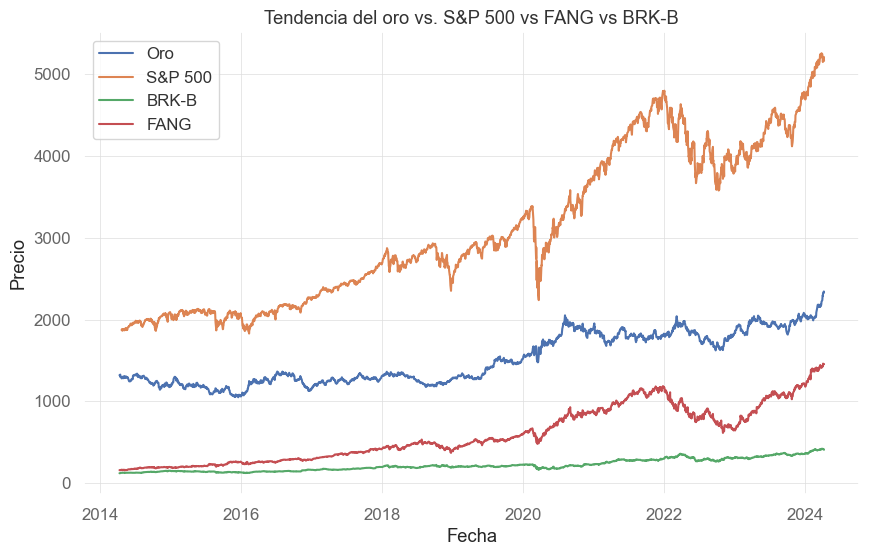

In [476]:
# Crear la gráfica
plt.figure(figsize=(10, 6))
sns.lineplot(x=gold.index, y="close", data=gold, label="Oro")
sns.lineplot(x=index_sp500.index, y="S&P500", data=index_sp500, label="S&P 500")
sns.lineplot(x=buffet.index, y="Close", data=buffet, label="BRK-B")
sns.lineplot(x=magnificas.index, y="Valor_indice", data=magnificas, label="FANG")
plt.title("Tendencia del oro vs. S&P 500 vs FANG vs BRK-B")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.grid(True)
plt.show()

#### A simple vista tienen tendencias parecidas, aunque sería bueno ajustar su escale normalizando (WIP)

##### Vamos a volver a hacer una matriz de correlación para ver la relación entre los índices

In [477]:
hipo_terc_dt=pd.concat([gold,index_sp500,magnificas,buffet],axis=1,join='inner')
hipo_terc_dt.sort_index(ascending= True)
hipo_terc_dt=hipo_terc_dt.rename(columns = {'close':'Oro','Valor_indice':'FANG','Close':'BRK-B','volume':'VolumenOro',
                                            'Volumen_total':'Volumen_Fang','Volume':'Volumen_BRK-B'})
hipo_terc_dt=hipo_terc_dt.drop(['year','year','year','tkr','Symbol'],axis=1)
hipo_terc_dt

,Oro,VolumenOro,S&P500,FANG,Volumen_Fang,BRK-B,Volumen_BRK-B
DateTime,,,,,,,
2014-04-21,1288.000000,100,1871.89,163.052490,3.764566e+08,126.500000,2636400.0
2014-04-22,1280.599976,100,1879.55,165.142572,4.117904e+08,127.150002,4382300.0
2014-04-23,1284.199951,176,1875.39,162.294933,6.285899e+08,127.199997,2568900.0
2014-04-24,1290.500000,522,1878.61,164.051105,1.164599e+09,126.949997,2848400.0
2014-04-25,1300.699951,274,1863.40,158.976263,9.052650e+08,127.260002,2765700.0
...,...,...,...,...,...,...,...
2024-04-04,2288.800049,251,5147.21,1429.560028,1.653607e+08,415.320007,3800600.0
2024-04-05,2325.699951,344,5204.34,1461.450027,1.364665e+08,418.619995,2738300.0
2024-04-08,2331.699951,202,5202.39,1453.619995,1.208213e+08,415.970001,2485700.0


In [478]:
final_corr = hipo_terc_dt.corr()
final_corr

,Oro,VolumenOro,S&P500,FANG,Volumen_Fang,BRK-B,Volumen_BRK-B
Oro,1.000000,-0.020519,0.916015,0.925939,-0.372903,0.870652,0.128543
VolumenOro,-0.020519,1.000000,-0.012257,-0.012459,0.029107,-0.011980,-0.016401
S&P500,0.916015,-0.012257,1.000000,0.981528,-0.468912,0.963305,0.053447
FANG,0.925939,-0.012459,0.981528,1.000000,-0.444783,0.925379,0.096264
Volumen_Fang,-0.372903,0.029107,-0.468912,-0.444783,1.000000,-0.464798,0.441743
BRK-B,0.870652,-0.011980,0.963305,0.925379,-0.464798,1.000000,0.006367
Volumen_BRK-B,0.128543,-0.016401,0.053447,0.096264,0.441743,0.006367,1.000000


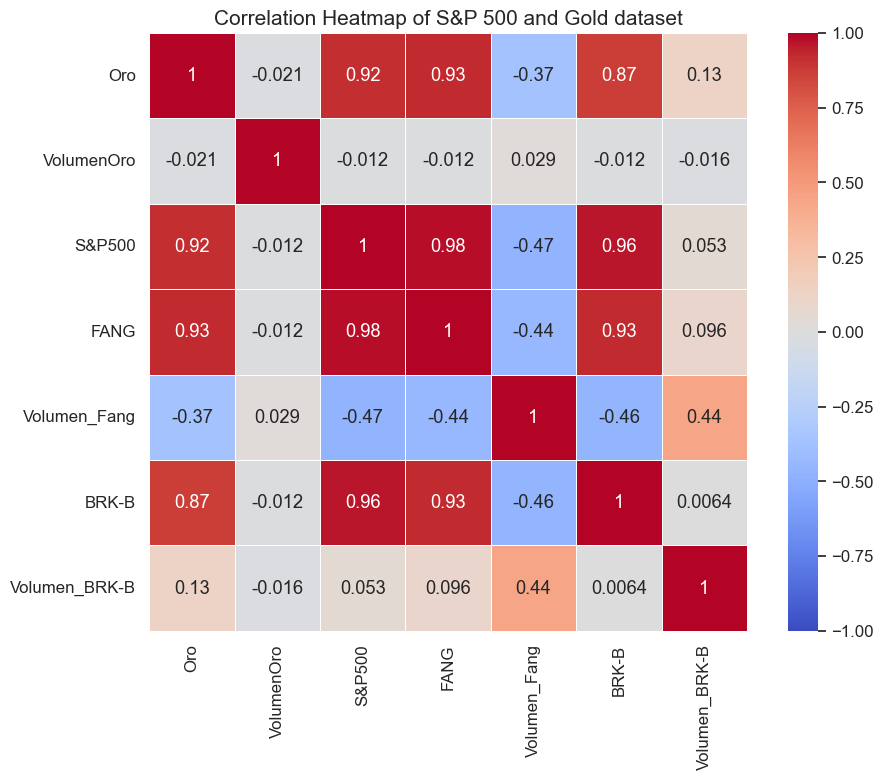

In [481]:
#sns.heatmap(pokemon.corr(), annot= True)
mask = np.zeros_like(final_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(final_corr,  vmax=1, vmin=-1, linewidths=.5, square=True, cmap='coolwarm', annot=True)
    plt.title('Correlation Heatmap of S&P 500, Gold, BRK-B, FANG', fontsize = 15)
    plt.yticks(rotation=0)
    plt.tight_layout()

## Conclusiones Hipótesis 3:

#### 1- Como es lógico el S&P500 tiene un fuerte relación con las FANG ya que gran parte de su capitalización depende de ellas 
#### 2- Al ser BRK-B una empresa que ha batido al índice pero con la misma tendencia, se observa una dependencia lineal
#### 3- Los volumnes de negociación tienen una correlaciión negativa notable con los índices, lo cual resulta lógico ya que a mayor negociación mayor volatidad del indice o valor.